# Wake dilution scenarios with varying speed and discharge rate

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-7-cf1fdea6f8bc>:18: RuntimeWarning: divide by zero encountered in divide
  con=7500000*(1/D)
<ipython-input-7-cf1fdea6f8bc>:39: RuntimeWarning: divide by zero encountered in divide
  conU=7500000*(1/D)


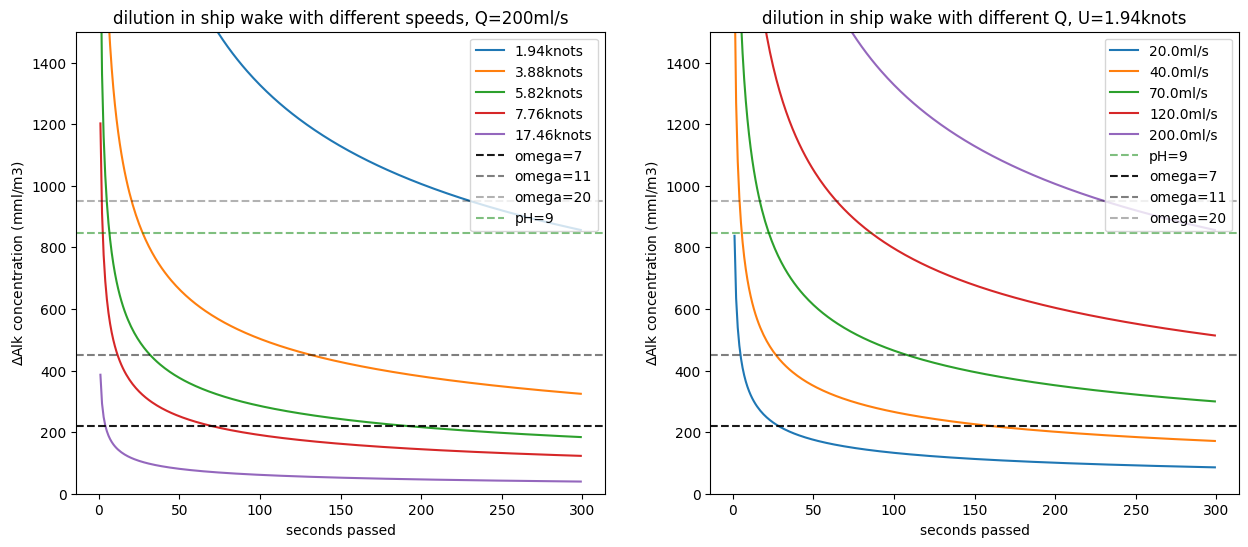

In [ ]:
#IMCO formula with varying discharge rate
t=np.arange(0,5*60)
c=0.0045
U1=1
L=10
#eff_mix_volume_per_sec=c*U**(1.4)*L**(1.6)
## 7500000 mmol/m3

Q1=np.arange(20.0*10**(-6),250*10**(-6),10*10**(-7))#*7500000  #moles/sec

L=10
s=(len(Q1),len(t))
D=np.zeros(s)
for k in range(0,len(t)):
  D[:,k]=(c/Q1[:])*U1**(1.4)*L**(1.6)*t[k]**(0.4)
#concentration over time

con=7500000*(1/D)


#IMCO formula with varying ship speed
t=np.arange(0,5*60)
c=0.0045
U=np.arange(1,10)
Q=2.5*10**(-5)
L=10
eff_mix_volume_per_sec=c*U**(1.4)*L**(1.6)
## 7500000 mmol/m3

#Q=np.arange(20.0*10**(-6),100*10**(-6),5*10**(-7))#*7500000  #moles/sec
Q=200*10**(-6)
L=10
s=(len(U),len(t))
D=np.zeros(s)
for k in range(0,len(t)):
  D[:,k]=(c/Q)*U[:]**(1.4)*L**(1.6)*t[k]**(0.4)
#concentration over time

conU=7500000*(1/D)

f, (ax1, ax2) =plt.subplots(1,2,figsize=(15, 6))
ax1.plot(t,conU[0,:],label=str(U[0]*1.94)+'knots')
ax1.plot(t,conU[1,:],label=str(U[1]*1.94)+'knots')
ax1.plot(t,conU[2,:],label=str(U[2]*1.94)+'knots')
ax1.plot(t,conU[3,:],label=str(U[3]*1.94)+'knots')
ax1.plot(t,conU[8,:],label=str(U[8]*1.94)+'knots')
ax1.set_ylabel('$\Delta$Alk concentration (mml/m3)')
ax1.set_xlabel('seconds passed')
ax1.set_title('dilution in ship wake with different speeds, Q='+str(format(Q*10**6,".0f"))+'ml/s')
ax1.set_ylim(0,1500)

eff_mix_volume_per_sec
ax1.axhline(y = 220, color = 'k', linestyle = '--',alpha=0.9,label='omega=7')
ax1.axhline(y = 450, color = 'k', linestyle = '--',alpha=0.5,label='omega=11')
ax1.axhline(y = 950, color = 'k', linestyle = '--',alpha=0.3,label='omega=20')
ax1.axhline(y = 845, color = 'g', linestyle = '--',alpha=0.5,label='pH=9')
ax1.legend(loc='upper right')


ax2.plot(t,con[0,:],label=str(format(Q1[0]*10**6,".1f"))+'ml/s')
ax2.plot(t,con[20,:],label=str(format(Q1[20]*10**6,".1f"))+'ml/s')
ax2.plot(t,con[50,:],label=str(format(Q1[50]*10**6,".1f"))+'ml/s')
ax2.plot(t,con[100,:],label=str(format(Q1[100]*10**6,".1f"))+'ml/s')
ax2.plot(t,con[180,:],label=str(format(Q1[180]*10**6,".1f"))+'ml/s')
ax2.axhline(y = 845, color = 'g', linestyle = '--',alpha=0.5,label='pH=9')
ax2.set_ylabel('$\Delta$Alk concentration (mml/m3)')
ax2.set_xlabel('seconds passed')
ax2.set_title('dilution in ship wake with different Q, U='+str(U1*1.94)+'knots')
ax2.set_ylim(0,1500)

eff_mix_volume_per_sec
ax2.axhline(y = 220, color = 'k', linestyle = '--',alpha=0.9,label='omega=7')
ax2.axhline(y = 450, color = 'k', linestyle = '--',alpha=0.5,label='omega=11')
ax2.axhline(y = 950, color = 'k', linestyle = '--',alpha=0.3,label='omega=20')
ax2.legend(loc='upper right')

In [ ]:
#calculate radius of wake after 5 min from Chou

x=U*300
B=3

rw=0.72*B*(x/(7*B))**(0.276)
rw


array([4.49993968, 5.44867584, 6.09385559, 6.59743697, 7.01653043,
       7.37864196, 7.69934448, 7.98839495, 8.25234973])

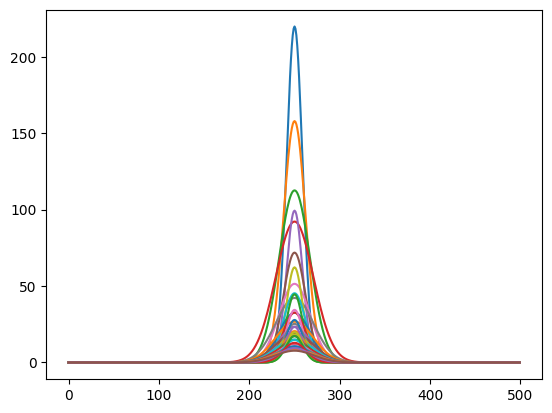

In [ ]:
# make a guassian where the radius is assumed to be two sigma
import scipy as sp
from scipy import stats


dx = 1
dt = 1
length = 500 # m
k = 0.02 #m2/s
temp_left = 0
temp_right = 0
total_time = 3600*6
x_data = np.arange(-length/2,length/2,dx)
x_vec = np.linspace(0, length, int(length/dx))
t_vec = np.linspace(0, total_time, int(total_time/dt))
u = np.zeros([len(t_vec), len(x_vec)])

alk_max=np.zeros((len(u[:,0]),len(rw)))

for i in range(len(rw)):
#for i in range(2):
  y_data = stats.norm.pdf(x_data, 0, rw[i]/2)
  scalar=conU[i,299]/np.max(y_data)
  gaus=y_data*scalar
  u = np.zeros([len(t_vec), len(x_vec)])
  u[0:10, :] = gaus
  u[0, 0] = temp_left
  u[0, -1] = temp_right
  for t in range(1, len(t_vec)-1):
      for x in range(1, len(x_vec)-1):
            u[t+1, x] = k * (dt / dx**2) * (u[t, x+1] - 2*u[t, x] +
                                        u[t, x-1]) + u[t, x]

  for z in range(len(alk_max[:,i])):
    alk_max[z,i]=np.max(u[z,:])

  plt.plot(u[1800,:])
  plt.plot(u[3600,:])
  plt.plot(u[3600*2,:])
  plt.plot(u[3600*3,:])




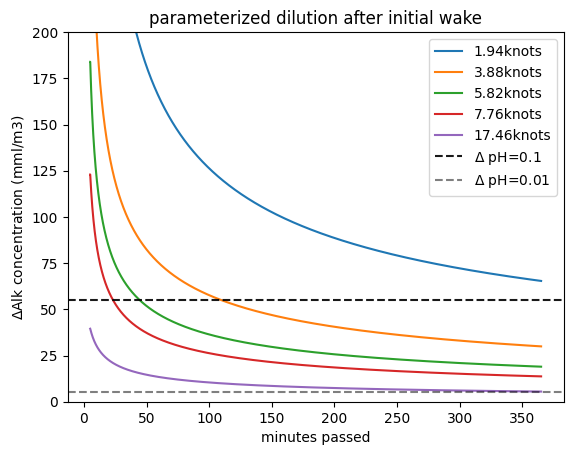

In [ ]:


plt.plot(5+t_vec/60,alk_max[:,0],label=str(U[0]*1.94)+'knots')
plt.plot(5+t_vec/60,alk_max[:,1],label=str(U[1]*1.94)+'knots')
plt.plot(5+t_vec/60,alk_max[:,2],label=str(U[2]*1.94)+'knots')
plt.plot(5+t_vec/60,alk_max[:,3],label=str(U[3]*1.94)+'knots')
plt.plot(5+t_vec/60,alk_max[:,8],label=str(U[8]*1.94)+'knots')
plt.ylim(0,200)
plt.title('parameterized dilution after initial wake')
plt.xlabel('minutes passed')
plt.ylabel('$\Delta$Alk concentration (mml/m3)')
plt.axhline(y = 55, color = 'k', linestyle = '--',alpha=0.9,label='$\Delta$ pH=0.1')
plt.axhline(y = 5, color = 'k', linestyle = '--',alpha=0.5,label='$\Delta$ pH=0.01')
plt.legend()

In [ ]:
#Total number of IBCs

ship_time=3600*6 #sec
Q=200 #ml/s
total=ship_time*Q*0.001
transects=3600*6*1/1000


21.6

In [ ]:
# width of patch
width=rw[0]*2*transects
width

194.397394107481